In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Especificando a biblioteca seaborn em sua configuração default

Os dados foram retirados do seguinte repositório:
https://www.stefanfiott.com/machine-learning/concrete-compressive-strength-regression-model-using-keras/

In [2]:
df = pd.read_excel('Concrete_Data.xls')
df.head()

,Cimento,Escória,Cinzas,Água,Superplastificante,Agregado graúdo,Agregado fino,Idade,fck
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.describe()

,Cimento,Escória,Cinzas,Água,Superplastificante,Agregado graúdo,Agregado fino,Idade,fck
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [4]:
df_age28 = df.loc[df['Idade'] == 28]
df_age28.head()

,Cimento,Escória,Cinzas,Água,Superplastificante,Agregado graúdo,Agregado fino,Idade,fck
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [5]:
df_age28.describe()

,Cimento,Escória,Cinzas,Água,Superplastificante,Agregado graúdo,Agregado fino,Idade,fck
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.0,425.000000
mean,265.443388,86.285012,62.794706,183.059082,6.994605,956.059129,764.376635,28.0,36.748480
std,104.670527,87.826404,66.227538,19.329394,5.392075,83.801548,73.120060,0.0,14.711211
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,28.0,8.535713
25%,160.200000,0.000000,0.000000,171.000000,0.000000,882.600000,712.000000,28.0,26.227667
50%,261.000000,94.700000,60.000000,185.000000,7.800000,953.200000,769.300000,28.0,33.762261
75%,323.700000,160.500000,120.000000,193.300000,10.300000,1013.200000,811.500000,28.0,44.388465
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,28.0,81.751169


In [6]:
df_age28.corr(method = 'pearson')

,Cimento,Escória,Cinzas,Água,Superplastificante,Agregado graúdo,Agregado fino,Idade,fck
Cimento,1.000000,-0.384743,-0.398613,-0.190272,-0.046934,0.020778,-0.124040,NaN,0.666058
Escória,-0.384743,1.000000,-0.251259,0.123474,0.024699,-0.249908,-0.262033,NaN,0.141404
Cinzas,-0.398613,-0.251259,1.000000,-0.025742,0.462265,-0.255168,-0.051904,NaN,-0.269446
Água,-0.190272,0.123474,-0.025742,1.000000,-0.443441,-0.272437,-0.367800,NaN,-0.398556
Superplastificante,-0.046934,0.024699,0.462265,-0.443441,1.000000,-0.330106,0.094681,NaN,0.213257
Agregado graúdo,0.020778,-0.249908,-0.255168,-0.272437,-0.330106,1.000000,-0.179138,NaN,-0.120295
Agregado fino,-0.124040,-0.262033,-0.051904,-0.367800,0.094681,-0.179138,1.000000,NaN,-0.138026
Idade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fck,0.666058,0.141404,-0.269446,-0.398556,0.213257,-0.120295,-0.138026,NaN,1.000000


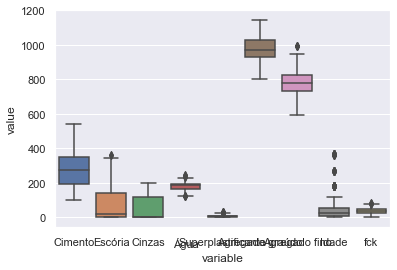

In [7]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

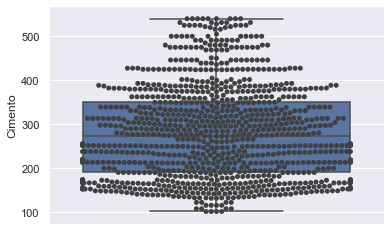

In [8]:
#sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=df['Cimento'])
ax = sns.swarmplot(y=df['Cimento'], color=".25")
#ax = sns.boxplot(x="day", y="total_bill", data=tips)

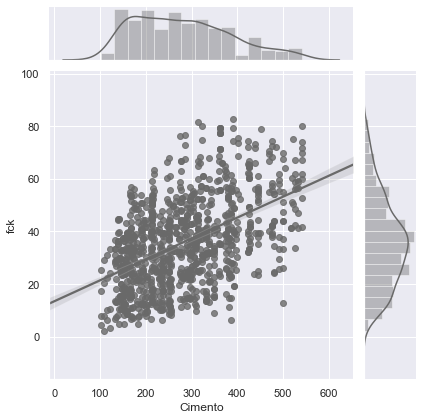

In [9]:
cols = df.columns
color = ['dimgray', 'khaki', 'mediumorchid','cornflowerblue', 'crimson','orangered', 'navy', 'salmon']
sns.set(font_scale=1)

sns.jointplot(data=df, x=cols[0], y=cols[-1]
                  ,kind='reg',color=color[0])
plt.show()

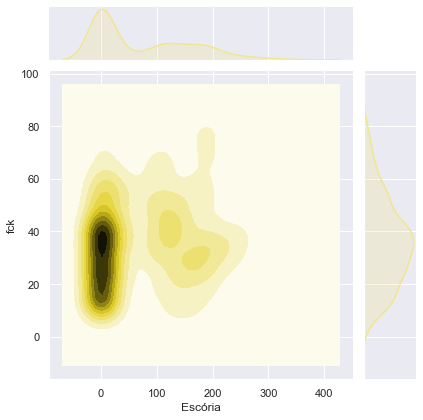

In [10]:
sns.jointplot(data=df, x=cols[1], y=cols[-1]
                  ,kind='kde',color=color[1])
plt.show()

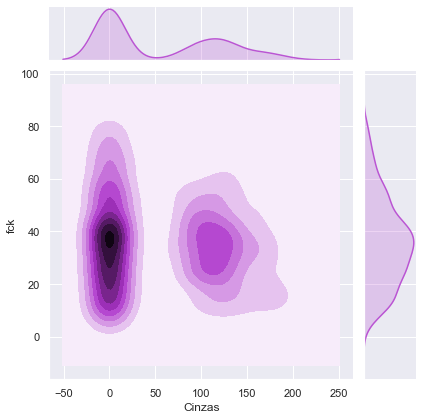

In [11]:
sns.jointplot(data=df, x=cols[2], y=cols[-1]
                  ,kind='kde',color=color[2])
plt.show()

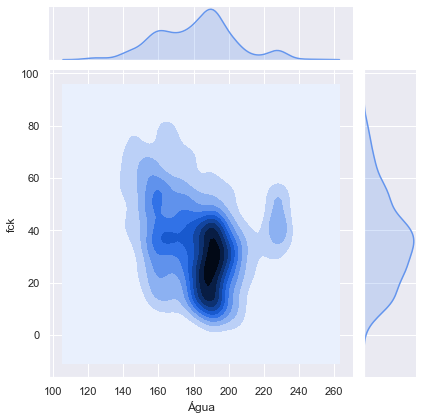

In [12]:
sns.jointplot(data=df, x=cols[3], y=cols[-1]
                  ,kind='kde',color=color[3])
plt.show()

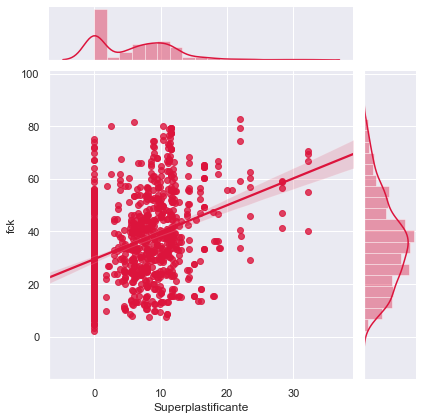

In [13]:
sns.jointplot(data=df, x=cols[4], y=cols[-1]
                  ,kind='reg',color=color[4])
plt.show()

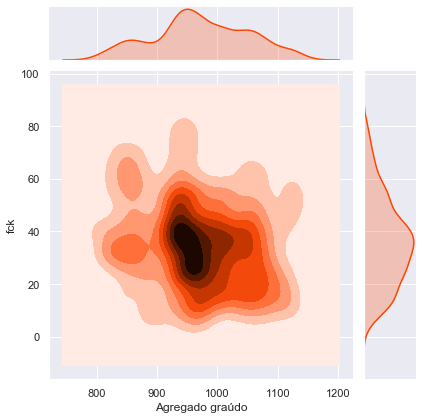

In [14]:
sns.jointplot(data=df, x=cols[5], y=cols[-1]
                  ,kind='kde',color=color[5])
plt.show()

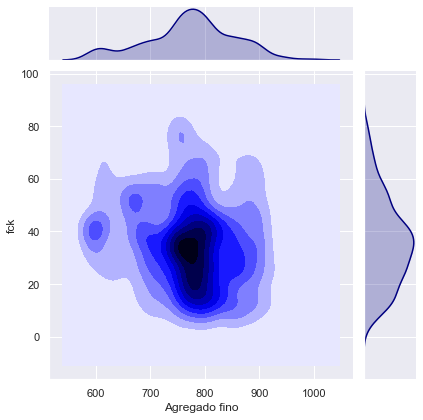

In [15]:
sns.jointplot(data=df, x=cols[6], y=cols[-1]
                  ,kind='kde',color=color[6])
plt.show()

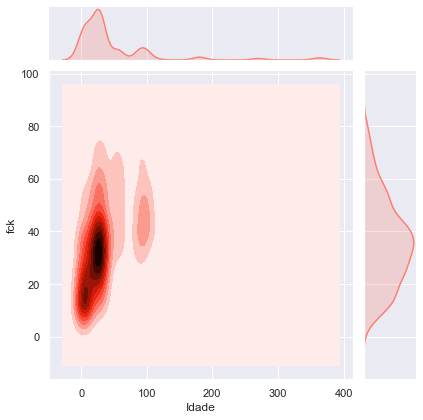

In [16]:
sns.jointplot(data=df, x=cols[7], y=cols[-1]
                  ,kind='kde',color=color[7])
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y = df_age28['Cimento'], boxpoints = 'all', marker = dict(size = 1)))
fig.add_trace(go.Box(y = df_age28['Escória'], boxpoints = 'all', marker = dict(size = 1)))
fig.add_trace(go.Box(y = df_age28['Cinzas'], boxpoints = 'all', marker = dict(size = 1)))
fig.add_trace(go.Box(y = df_age28['Água'], boxpoints = 'all', marker = dict(size = 1)))
fig.add_trace(go.Box(y = df_age28['Superplastificante'], boxpoints = 'all', marker = dict(size = 1)))
fig.add_trace(go.Box(y = df_age28['Agregado graúdo'], boxpoints = 'all', marker = dict(size = 1)))
fig.add_trace(go.Box(y = df_age28['Agregado fino'], boxpoints = 'all', marker = dict(size = 1)))
#fig.add_trace(go.Box(y = df_age28['fck'], boxpoints = 'all', marker = dict(size = 1)))
fig.update_layout(yaxis_tickformat = ' kg/m³')
fig.update_yaxes(nticks = 20)
fig.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense, Dropout

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

np.random.seed(123456)

In [30]:
entrada = df.iloc[:,0:8].values # Pegar as variáveis de entrada
saida = df.iloc[:,8].values # Pegar só os valores de fck

print(entrada.shape)
print(saida.shape)

(1030, 8)
(1030,)


In [31]:
# Separar Data em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(entrada, saida, test_size=0.30, random_state=22)
print('X_train {0}, y_train {1}'.format(X_train.shape, y_train.shape))
print('X_test {0}, y_test {1}'.format(X_test.shape, y_test.shape))

# Normalizar os dados
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()

X_train = scaler1.fit_transform(X_train)
X_test = scaler2.fit_transform(X_test)
y_train = scaler3.fit_transform(y_train.reshape(-1,1))

y_train = y_train.ravel()
print("\nApós normalizar")
print('X_train {0}, y_train {1}'.format(X_train.shape, y_train.shape))
print('X_test {0}, y_test {1}'.format(X_test.shape, y_test.shape))

X_train (721, 8), y_train (721,)
X_test (309, 8), y_test (309,)

Após normalizar
X_train (721, 8), y_train (721,)
X_test (309, 8), y_test (309,)


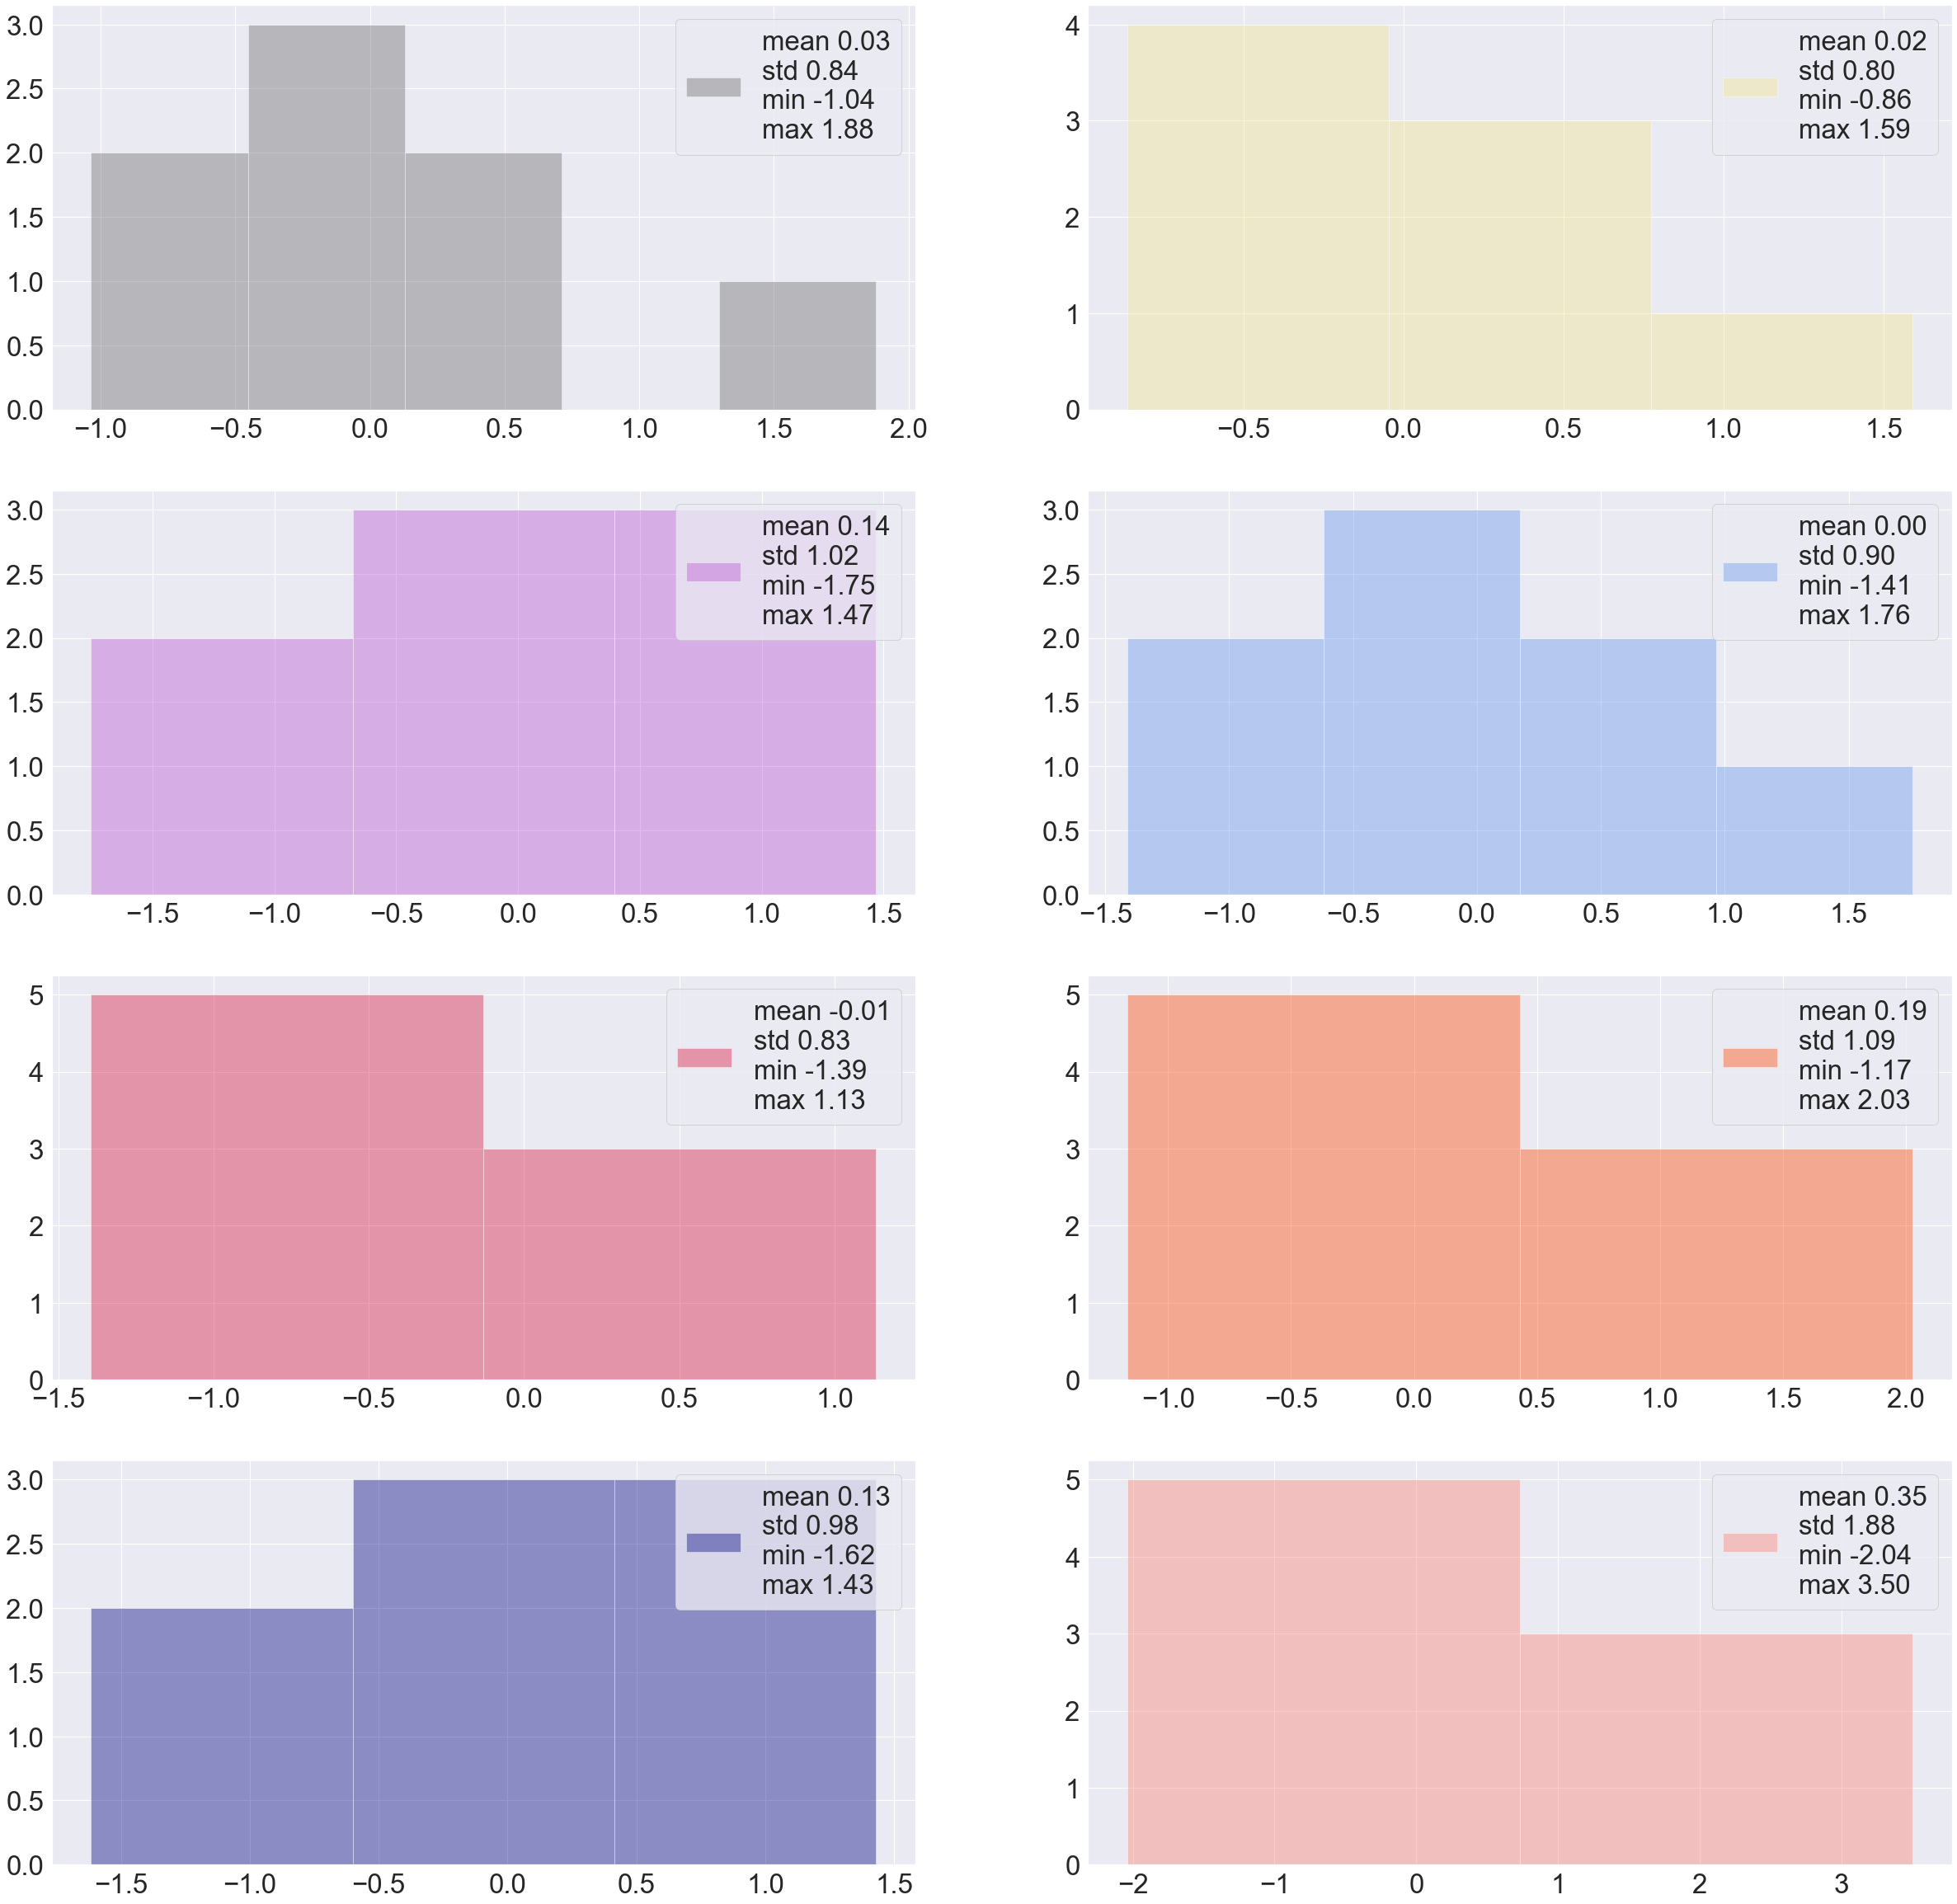

In [36]:
sns.set(font_scale=3)
cols = X_train.shape[1]
n_row = int(cols)
n_col = 2
n_sub = 1
fig = plt.figure(figsize=(20,40))
for i in range(cols):
    plt.subplots_adjust(left=-0.3, right=1.3, bottom=-0.3, top=1.3)
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(X_train[i],norm_hist=False,kde=False, color=color[i],
                 label=['mean '+str('{:.2f}'.format(X_train[i].mean()))
                        +'\n''std '+str('{:.2f}'.format(X_train[i].std()))
                        +'\n''min '+str('{:.2f}'.format(X_train[i].min()))
                        +'\n''max '+str('{:.2f}'.format(X_train[i].max()))])                                                        
    n_sub+=1
    plt.legend()
plt.show()

# MODELO ANN MLP

In [37]:
# Criar modelo
model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                225       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 25)               

In [39]:
model.fit(X_train, y_train, epochs=250, batch_size=128, verbose=0)
preds = model.predict(X_test)
pred = scaler3.inverse_transform(preds)

rmse = sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

rmse, r2

(5.407341256793894, 0.9004469026987153)

[5.5211968531855184, 5.51154462472476, 5.447227691418579, 5.319505425296818, 5.312746886158282, 5.465279811949175, 5.386930889505338, 5.478423542144451, 5.318155590407353, 5.243331552158376]
[0.8962104372134949, 0.8965730125456377, 0.8989728092441299, 0.903654877949961, 0.9038995392765662, 0.8983020911866937, 0.9011970238340374, 0.8978123460106933, 0.9037037672720145, 0.9063943939063377]


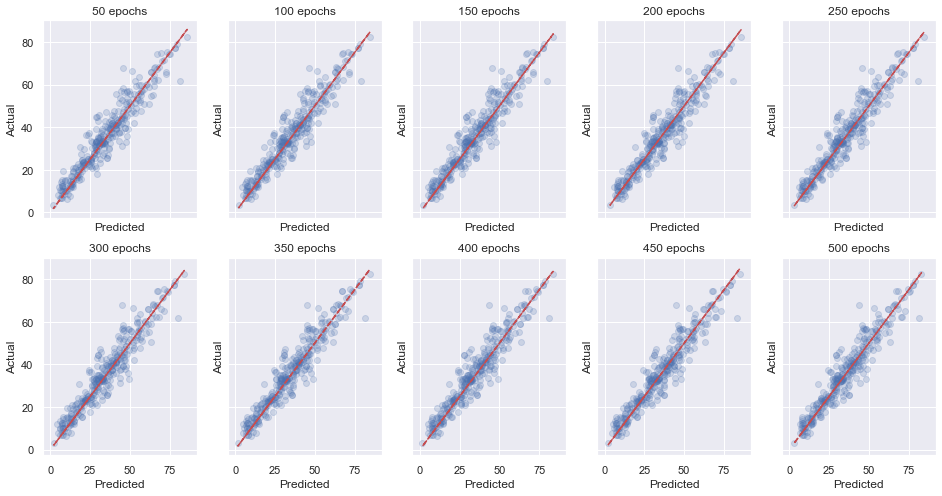

In [42]:
sns.set(font_scale=1)
fig, axes = plt.subplots(2, 5, figsize=(16,8), sharex=True, sharey=True)
losses = []
r2 = []
rmse = []
for i in range(2):
    for j in range(5):
        model.fit(X_train, y_train, epochs=(5*i+j+1)*50, batch_size=128, verbose=0)
        preds = model.predict(X_test)
        pred = scaler3.inverse_transform(preds)
        
        losses.append(mean_squared_error(y_test, pred))        
        rmse.append(sqrt(mean_squared_error(y_test, pred)))
        r2.append(r2_score(y_test, pred))
        
        axes[i,j].scatter(pred, y_test, alpha=0.2)
        axes[i,j].plot(pred, pred, 'r--')
        #axes[i,j].plot(preds, np.array(pred)+np.array(1*sqrt(pred_loss)), color = '0.8')
        #axes[i,j].plot(preds, np.array(pred)-np.array(1*sqrt(pred_loss)), color = '0.8')
        axes[i,j].set_title('{0} epochs'.format((5*i+j+1)*50))
        axes[i,j].set_ylabel('Actual')
        axes[i,j].set_xlabel('Predicted')
        
print(rmse)
print(r2)

Text(0, 0.5, '$R^2$')

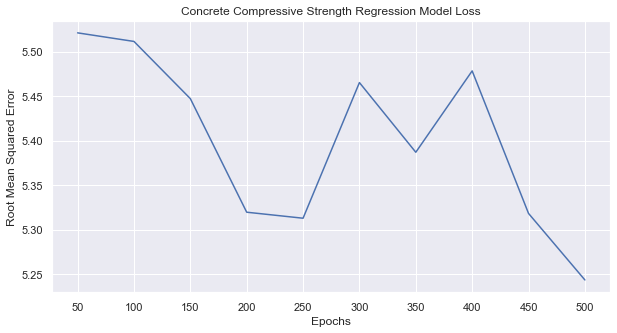

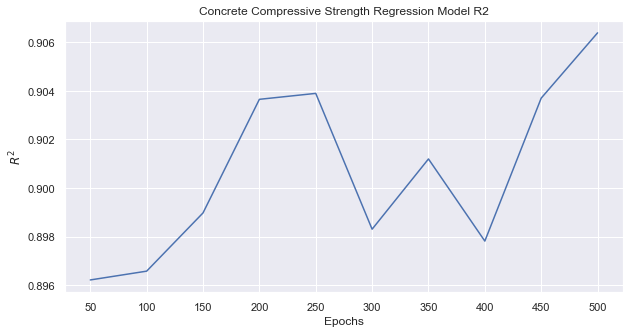

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(rmse)
ax.set_title('Concrete Compressive Strength Regression Model Loss')
epochs = [str(i*50) for i in range(1, len(rmse)+1)]
ax.set_xticks(range(len(rmse)))
ax.set_xticklabels(epochs)
ax.set_xlabel('Epochs')
ax.set_ylabel('Root Mean Squared Error')
#ax.text(len(losses)-2, losses[len(losses)-1]+10, 'Min MSE: {0:.2f}'.format(losses[len(losses)-1]));

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(r2)
ax.set_title('Concrete Compressive Strength Regression Model R2')
epochs = [str(i*50) for i in range(1, len(r2)+1)]
ax.set_xticks(range(len(r2)))
ax.set_xticklabels(epochs)
ax.set_xlabel('Epochs')
ax.set_ylabel('$R^2$')

# MODELO SVR

Mean squared error: 32.19
Root mean squared error: 5.67
R2: 0.89


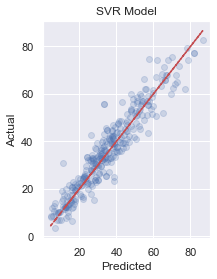

In [46]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), 
                   cv=5,
                   param_grid={'C': [1e0, 1e1, 1e2, 1e3],
                               'gamma': np.logspace(-2, 2, 5),
                               'epsilon': np.arange(0.1, 0.5, 0.1)})

svr.fit(X_train, y_train)
svr_y_pred = svr.best_estimator_.predict(X_test)

pred = scaler3.inverse_transform(svr_y_pred.reshape(-1,1)).ravel()

rmse = sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.scatter(pred, y_test, alpha=0.2)
ax.plot(pred, pred, 'r--')
ax.set_title('SVR Model'.format((5*i+j+1)*50))
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

print("Mean squared error: {0:.2f}".format(mean_squared_error(y_test, pred)))
print("Root mean squared error: {0:.2f}".format(rmse))
print("R2: {0:.2f}".format(r2))

# MODELO RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(123456)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [48]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

pred = scaler3.inverse_transform(predictions.reshape(-1,1)).ravel()
rmse = sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

In [49]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 36.23 degrees.
Accuracy: -2.14 %.


Mean squared error: 1576.53
Root mean squared error: 5.52
R2: 0.90


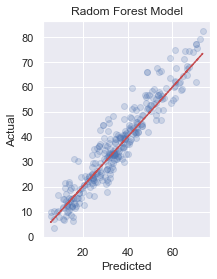

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.scatter(pred, y_test, alpha=0.2)
ax.plot(pred, pred, 'r--')
ax.set_title('Radom Forest Model'.format((5*i+j+1)*50))
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

print("Mean squared error: {0:.2f}".format(mean_squared_error(y_test, predictions)))
print("Root mean squared error: {0:.2f}".format(rmse))
print("R2: {0:.2f}".format(r2))